<a href="https://colab.research.google.com/github/nondeterministicNilu/Niladri/blob/master/digit_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import re

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


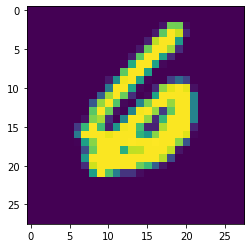

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[565])

In [5]:
y_train[565]

6

In [6]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [8]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [11]:
# looking at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_train[6].shape

(784,)

In [13]:
w=X_train[6].reshape(28,28)

In [14]:
w.shape

(28, 28)

In [15]:
import time
s=time.time()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochy
model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_data=(X_test, Y_test))
print(str(time.time()-s)+' sec')

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 32us/step - loss: 0.3776 - accuracy: 0.8947 - val_loss: 0.2088 - val_accuracy: 0.9404
2.258676528930664 sec


In [16]:
M=X_train[0:6000]
N=y_train[0:6000]
m=X_test[0:1000]
n=y_test[0:1000]

In [17]:
y_train.shape

(60000,)

In [18]:
import time
s=time.time()
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear', C=1E10)
model.fit(M, N)
n_pred = model.predict(m) 
print("Accuracy:",  accuracy_score(n, n_pred))
print(str(time.time()-s)+' sec')

Accuracy: 0.888
9.679291248321533 sec


In [22]:
import time
s=time.time()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(str(time.time()-s)+' sec')

Accuracy: 0.8776
18.994372844696045 sec


In [21]:
import time
s=time.time()
from sklearn import datasets, linear_model 
reg = linear_model.LogisticRegression() 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test) 
print("Accuracy:",  accuracy_score(y_test, y_pred)) 
print(str(time.time()-s)+' sec')

Accuracy: 0.9256
33.6272349357605 sec


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Predicting unknown values

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
for i in uploaded.keys():
  print(i)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
for i in uploaded.keys():
  Image(i,width=200)

In [ ]:
import cv2
for i in uploaded.keys():
  im=cv2.imread(i)

In [ ]:
im.shape

In [ ]:
import cv2

for i in uploaded.keys():
  im=cv2.imread(i)
#   full_path=i
# im=load_img(full_path,target_size=(28,28))
print(im)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [ ]:
im1=im[:,:,0]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im1)

In [ ]:
print(im1)

In [ ]:
im2=img_to_array(im1)

In [ ]:
im3=im2.reshape(1,784)

In [ ]:
print(im3)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im3)

In [ ]:
im4=im3/255

In [ ]:
digit = model.predict_classes(im4)
print(digit[0])
 
# entry point, run the example
#run_example()

In [ ]:
im3

In [ ]:
im5=255-im3

In [ ]:
im5

In [ ]:
im5=im5/255

In [ ]:
digit = model.predict_classes(im5)
print(digit[0])

In [ ]:
im3

In [ ]:
(_, idx, counts) = np.unique(im3, return_index=True, return_counts=True)
index = idx[np.argmax(counts)]
mode = im3[0][index]

In [ ]:
mode

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
lst=['/content/0.png','/content/1.jpg','/content/2.png','/content/3.png','/content/4.png','/content/5.png','/content/6.png','/content/7.png','/content/8.jpg','/content/9.png','/content/Q.jpg','/content/Q2.jpg','/content/4_1.png','/content/5_1.jpg']
for uploaded in lst:
  im=cv2.imread(uploaded)
  im1=im[:,:,0]
  im2=img_to_array(im1)
  im3=im2.reshape(1,784)
  (_, idx, counts) = np.unique(im3, return_index=True, return_counts=True)
  index = idx[np.argmax(counts)]
  mode = im3[0][index]
  if mode>200:
    im3=255-im3
  im4=im3/255
  print(uploaded)
  digit = model.predict_classes(im4)
  print('Predicted: '+str(digit[0])+'\t'+uploaded[9])